
# <font color="#8333ff"><center>Produisez une étude de marché avec R ou Python</center></font>

## Mise en situation


*La volaille est la  viande la plus consommée dans le monde.*

*Décision stratégique de la poule qui chante : Le lancement à l’international.*

*Les objectifs de cette étude sont :<br>
    -Connaitre les  facteurs  permettant de segmenter le mieux les pays dans le secteur du commerce de la volaille.<br>
    -Grouper les pays qui se rassemblent en  classes  qui les caractérisent et qui se différencient entre  elles.<br>
    -Caractériser les classes.*


## Sommaire :

**Partie 1 : Importation et inspection et nettoyage des données**
- <a href="#C1">1. Nettoyage des données de DisponibiliteAlimentaire</a>
- <a href="#C2">2. Nettoyage des données de Population</a>
- <a href="#C3">3. Nettoyage des données de StabilitePolitique</a>
- <a href="#C4">4. Nettoyage des données de ReseauFerroviaire</a>
- <a href="#C5">5. Nettoyage des données de PIB</a>
- <a href="#C6">6. Nettoyage des données de FoodPriceInflation</a>

**Partie 2 : Jointure**
- <a href="#C8">1. Choix du type de jointure</a>
- <a href="#C9">2.Jointure </a>

**Partie 3 : Etude de la pertinence d’une ACP**
- <a href="#C10">1.La moyenne arithmétique est-elle représentative de la tendance centrale?</a>
- <a href="#C11">2.La compression des variables est-elle pertinente?</a>

**Partie 4 : Identification et traitement de outliers**
- <a href="#C12">1.Détection de outliers unidimensionnels</a>
- <a href="#C13">2.Détection de outliers multidimensionnels</a>

**Partie 5 : L’ANALYSE EN COMPOSANTES PRINCIPALES**
- <a href="#C14">1. Etude de données sans aucun traitement de outliers</a>
- <a href="#C15">1.1 Data Split</a>
- <a href="#C16">1.2. Centrer-Réduire (Standardisation) et ACP</a>
- <a href="#C17">1.3. Explained variance & scree plot</a>
- <a href="#C18">1.4. Components</a>
- <a href="#C19">1.5. Correlation graph</a>
- <a href="#C20">1.6. Projection</a>
- <a href="#C21">2. Etude de données outliers(60 outliers)</a>
- <a href="#C22">3. Etude de données sans outliers(112 individus) </a>
- <a href="#C23">4. Etude de données traitées(imputation par la moyenne de valeurs extrêmes de 4 pays)</a>


In [1]:
# Import des librairies.
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mt
from scipy.stats import chi2
sns.set()
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## **Partie 1 : Importation et inspection de données**

In [2]:
# Chargement de données
DisponibiliteAlimentaire = pd.read_csv("DisponibiliteAlimentaire_2017.csv")
Population = pd.read_csv("Population_2000_2018.csv")
StabilitePolitique = pd.read_csv("StabilitePolitique.csv")
ReseauFerroviaire = pd.read_csv("reseauFerroviaire.csv")
FluxPoulet = pd.read_csv("FluxPoulet.csv")
PIB = pd.read_csv("PIB.csv")
FoodPriceInflation = pd.read_csv("FoodPriceInflation.csv")

### <a name="C1">1. Nettoyage des données de DisponibiliteAlimentaire</a>


In [119]:
# Afficher les 5 premières lignes 
DisponibiliteAlimentaire.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [120]:
# Dimensions de le DataFrame DisponibiliteAlimentaire
DisponibiliteAlimentaire.shape

(176600, 14)

In [121]:
# Supprimer les colonnes inutiles pour l'analyse
DisponibiliteAlimentaire.drop(columns =['Code zone','Code Domaine','Domaine','Code Élément','Code année','Symbole','Description du Symbole','Année','Code Produit'], inplace=True)
DisponibiliteAlimentaire.head()

,Zone,Élément,Produit,Unité,Valeur
0,Afghanistan,Production,Blé et produits,Milliers de tonnes,4281.0
1,Afghanistan,Importations - Quantité,Blé et produits,Milliers de tonnes,2302.0
2,Afghanistan,Variation de stock,Blé et produits,Milliers de tonnes,-119.0
3,Afghanistan,Exportations - Quantité,Blé et produits,Milliers de tonnes,0.0
4,Afghanistan,Disponibilité intérieure,Blé et produits,Milliers de tonnes,6701.0


In [122]:
# Identifier les produits à garder
DisponibiliteAlimentaire['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [123]:
# Garder les lignes utiles pour l'analyse
DisponibiliteAlimentaire = DisponibiliteAlimentaire.loc[DisponibiliteAlimentaire['Produit'] == 'Viande de Volailles', :]
DisponibiliteAlimentaire.head()

,Zone,Élément,Produit,Unité,Valeur
651,Afghanistan,Production,Viande de Volailles,Milliers de tonnes,28.0
652,Afghanistan,Importations - Quantité,Viande de Volailles,Milliers de tonnes,29.0
653,Afghanistan,Variation de stock,Viande de Volailles,Milliers de tonnes,0.0
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,Milliers de tonnes,57.0
655,Afghanistan,Pertes,Viande de Volailles,Milliers de tonnes,2.0


In [124]:
# calcul du nombre de lignes dupliquées
DisponibiliteAlimentaire.duplicated(['Zone','Élément']).sum()

0

In [125]:
# Pivotage
DisponibiliteAlimentaire = DisponibiliteAlimentaire.pivot(index = ['Zone'], columns = 'Élément', values = 'Valeur').reset_index()
DisponibiliteAlimentaire.head()

Élément,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,-0.0
2,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
3,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
4,Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0


In [126]:
# Supprimer les colonnes inutiles pour l'analyse
DisponibiliteAlimentaire.drop(columns =['Aliments pour animaux','Semences','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de matière grasse en quantité (g/personne/jour)', 'Alimentation pour touristes', 'Autres utilisations (non alimentaire)', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Pertes' , 'Résidus','Traitement','Variation de stock','Nourriture'], inplace=True)
DisponibiliteAlimentaire.head()

Élément,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,5.0,57.0,NaN,29.0,28.0
1,Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0
2,Albanie,85.0,47.0,0.0,38.0,13.0
3,Algérie,22.0,277.0,0.0,2.0,275.0
4,Allemagne,71.0,1739.0,646.0,842.0,1514.0


In [127]:
# La somme des valeurs manquantes 
DisponibiliteAlimentaire.isna().sum()

Élément
Zone                                               0
Disponibilité alimentaire (Kcal/personne/jour)     0
Disponibilité intérieure                           2
Exportations - Quantité                           37
Importations - Quantité                            2
Production                                         4
dtype: int64

In [128]:
# En se référant à l'analyse déjà faite en projet 4
# Remplacer NAN par 0
DisponibiliteAlimentaire.fillna(0, inplace=True) 

In [129]:
# Des indications globales
DisponibiliteAlimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Zone                                            172 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)  172 non-null    float64
 2   Disponibilité intérieure                        172 non-null    float64
 3   Exportations - Quantité                         172 non-null    float64
 4   Importations - Quantité                         172 non-null    float64
 5   Production                                      172 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.2+ KB


In [130]:
# Vérifier les types des colonnes
DisponibiliteAlimentaire.dtypes

Élément
Zone                                               object
Disponibilité alimentaire (Kcal/personne/jour)    float64
Disponibilité intérieure                          float64
Exportations - Quantité                           float64
Importations - Quantité                           float64
Production                                        float64
dtype: object

### <a name="C2">2. Nettoyage des données de Population</a>

In [131]:
# Afficher les 5 premières lignes
Population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [132]:
# Dimensions 
Population.shape

(4411, 15)

In [133]:
# Supprimer les colonnes inutiles pour l'analyse
Population.drop(columns =['Code zone','Code Domaine','Domaine','Code Élément','Code année','Unité','Code Produit','Symbole','Description du Symbole','Note','Produit','Élément'], inplace=True)
Population

,Zone,Année,Valeur
0,Afghanistan,2000,20779.953
1,Afghanistan,2001,21606.988
2,Afghanistan,2002,22600.770
3,Afghanistan,2003,23680.871
4,Afghanistan,2004,24726.684
...,...,...,...
4406,Zimbabwe,2014,13586.707
4407,Zimbabwe,2015,13814.629
4408,Zimbabwe,2016,14030.331
4409,Zimbabwe,2017,14236.595


In [134]:
# Renommer la colonne'Valeur'en'population'
Population = Population.rename(columns = {'Valeur':'Population'})
Population.head()

,Zone,Année,Population
0,Afghanistan,2000,20779.953
1,Afghanistan,2001,21606.988
2,Afghanistan,2002,22600.770
3,Afghanistan,2003,23680.871
4,Afghanistan,2004,24726.684


In [135]:
# Vérifier les types des colonnes 
Population.dtypes

Zone           object
Année           int64
Population    float64
dtype: object

In [136]:
# garder les données en 20017
Population = Population.loc[Population['Année']==2017]
Population

,Zone,Année,Population
17,Afghanistan,2017,36296.113
36,Afrique du Sud,2017,57009.756
55,Albanie,2017,2884.169
74,Algérie,2017,41389.189
93,Allemagne,2017,82658.409
...,...,...,...
4333,Venezuela (République bolivarienne du),2017,29402.484
4352,Viet Nam,2017,94600.648
4371,Yémen,2017,27834.819
4390,Zambie,2017,16853.599


In [137]:
# Pivotage
Population = Population.pivot(index = ['Zone'], columns = 'Année', values = 'Population').reset_index()
Population

Année,Zone,2017
0,Afghanistan,36296.113
1,Afrique du Sud,57009.756
2,Albanie,2884.169
3,Algérie,41389.189
4,Allemagne,82658.409
...,...,...
231,Îles Salomon,636.039
232,Îles Turques-et-Caïques,37.115
233,Îles Vierges américaines,104.751
234,Îles Vierges britanniques,29.577


In [138]:
# Renommer la colonne '2017' en 'population2017'
Population = Population.rename(columns = {2017:'population2017'})
Population

Année,Zone,population2017
0,Afghanistan,36296.113
1,Afrique du Sud,57009.756
2,Albanie,2884.169
3,Algérie,41389.189
4,Allemagne,82658.409
...,...,...
231,Îles Salomon,636.039
232,Îles Turques-et-Caïques,37.115
233,Îles Vierges américaines,104.751
234,Îles Vierges britanniques,29.577


In [139]:
# Calcul du nombre de lignes dupliquées
Population.duplicated(['Zone']).sum()

0

In [140]:
# Nombre de valeurs manquantes
Population.isna().sum()

Année
Zone              0
population2017    0
dtype: int64

### <a name="C3">3. Nettoyage des données de StabilitePolitique</a>

In [141]:
# Afficher les 5 premières lignes  
StabilitePolitique.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2020,2020,indice,-2.73,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2020,2020,indice,-0.24,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,8,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2020,2020,indice,0.08,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,12,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2020,2020,indice,-0.86,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,276,Allemagne,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2020,2020,indice,0.67,X,Ciffre de sources internationales,NaN


In [142]:
# Supprimer les colonnes inutiles pour l'analyse
StabilitePolitique.drop(columns =['Code zone (M49)','Code Domaine','Domaine','Code Élément','Code année','Année','Unité','Code Produit','Symbole','Description du Symbole','Note','Produit','Élément'], inplace=True)
StabilitePolitique.head()

,Zone,Valeur
0,Afghanistan,-2.73
1,Afrique du Sud,-0.24
2,Albanie,0.08
3,Algérie,-0.86
4,Allemagne,0.67


In [143]:
# Renommer la colonne 'Valeur' en 'indice de la stabilité politique'
StabilitePolitique = StabilitePolitique.rename(columns = {'Valeur':'indice de la stabilité politique'})
StabilitePolitique.head()

,Zone,indice de la stabilité politique
0,Afghanistan,-2.73
1,Afrique du Sud,-0.24
2,Albanie,0.08
3,Algérie,-0.86
4,Allemagne,0.67


In [144]:
# Vérifier les types des colonnes
StabilitePolitique.dtypes

Zone                                 object
indice de la stabilité politique    float64
dtype: object

In [145]:
# La somme de valeurs manquantes 
StabilitePolitique.isna().sum()

Zone                                0
indice de la stabilité politique    0
dtype: int64

In [146]:
# Calcul du nombres de lignes dupliquées
StabilitePolitique.duplicated('Zone').sum()

0

### <a name="C4">4. Nettoyage des données de ReseauFerroviaire</a>

In [147]:
# Afficher les 5 premières lignes 
ReseauFerroviaire.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,12,Algérie,6124,Valeur,21016,Densité du réseau ferroviaire (pour 100 km car...,2018,2018,pour 100 km carrés de surface totale du pays,0.2,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,276,Allemagne,6124,Valeur,21016,Densité du réseau ferroviaire (pour 100 km car...,2018,2018,pour 100 km carrés de surface totale du pays,9.4,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,682,Arabie saoudite,6124,Valeur,21016,Densité du réseau ferroviaire (pour 100 km car...,2018,2018,pour 100 km carrés de surface totale du pays,0.1,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,32,Argentine,6124,Valeur,21016,Densité du réseau ferroviaire (pour 100 km car...,2018,2018,pour 100 km carrés de surface totale du pays,0.6,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,40,Autriche,6124,Valeur,21016,Densité du réseau ferroviaire (pour 100 km car...,2018,2018,pour 100 km carrés de surface totale du pays,5.8,X,Ciffre de sources internationales,NaN


In [148]:
# Supprimer les colonnes inutiles pour l'analyse
ReseauFerroviaire.drop(columns =['Code zone (M49)','Code Domaine','Domaine','Code Élément','Code année','Année','Unité','Code Produit','Symbole','Description du Symbole','Note','Produit','Élément'], inplace=True)
ReseauFerroviaire

,Zone,Valeur
0,Algérie,0.2
1,Allemagne,9.4
2,Arabie saoudite,0.1
3,Argentine,0.6
4,Autriche,5.8
...,...,...
64,Turkménistan,1.6
65,Turquie,1.3
66,Ukraine,3.6
67,Viet Nam,0.7


In [149]:
# Renommer la colonne 'Valeur' 
ReseauFerroviaire = ReseauFerroviaire.rename(columns = {'Valeur':'Densité du réseau ferroviaire(pour 100 km carrés de surface totale du pays)'
})
ReseauFerroviaire.head()

,Zone,Densité du réseau ferroviaire(pour 100 km carrés de surface totale du pays)
0,Algérie,0.2
1,Allemagne,9.4
2,Arabie saoudite,0.1
3,Argentine,0.6
4,Autriche,5.8


In [150]:
# La somme des valeurs manquantes 
ReseauFerroviaire.isna().sum()

Zone                                                                           0
Densité du réseau ferroviaire(pour 100 km carrés de surface totale du pays)    0
dtype: int64

In [151]:
# Calcul du nombre des lignes dupliquées
ReseauFerroviaire.duplicated('Zone').sum()

0

In [152]:
# Vérifier les types des colonnes
ReseauFerroviaire.dtypes

Zone                                                                            object
Densité du réseau ferroviaire(pour 100 km carrés de surface totale du pays)    float64
dtype: object

### <a name="C5">5. Nettoyage de données de PIB</a>

In [153]:
# Afficher les 5 premières lignes  
PIB.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2021,2021,I$,13126.0,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,8,Albanie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2021,2021,I$,14520.1,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,12,Algérie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2021,2021,I$,10957.2,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,276,Allemagne,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2021,2021,I$,52930.8,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,24,Angola,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2021,2021,I$,5990.4,X,Ciffre de sources internationales,NaN


In [154]:
# Supprimer les colonnes inutiles pour l'analyse
PIB.drop(columns =['Code zone (M49)','Code Domaine','Domaine','Code Élément','Code année','Année','Unité','Code Produit','Symbole','Description du Symbole','Note','Produit','Élément'], inplace=True)
PIB.head()

,Zone,Valeur
0,Afrique du Sud,13126.0
1,Albanie,14520.1
2,Algérie,10957.2
3,Allemagne,52930.8
4,Angola,5990.4


In [155]:
# Renommer la colonne 'Valeur' 
PIB = PIB.rename(columns = {'Valeur':'PIB par habitant'})
PIB.head()

,Zone,PIB par habitant
0,Afrique du Sud,13126.0
1,Albanie,14520.1
2,Algérie,10957.2
3,Allemagne,52930.8
4,Angola,5990.4


In [156]:
# La somme des valeurs manquantes 
PIB.isna().sum()

Zone                0
PIB par habitant    0
dtype: int64

In [157]:
# Vérifier les types des colonnes
PIB.dtypes

Zone                 object
PIB par habitant    float64
dtype: object

In [158]:
# Calcul du nombre des lignes dupliquées
PIB.duplicated('Zone').sum()

0

### <a name="C6">6.Nettoyage de données de FoodPriceInflation</a>

In [159]:
# Afficher les 5 premières lignes 
FoodPriceInflation.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code année,Année,Code Produit,Produit,Code Mois,Mois,Unité,Valeur,Symbole,Description du Symbole,Note
0,CP,Indices de Prix à la Consommation,4,Afghanistan,2022,2022,23014,Food price inflation,7001,Janvier,%,19.960327,E,Valeur estimée,NaN
1,CP,Indices de Prix à la Consommation,710,Afrique du Sud,2022,2022,23014,Food price inflation,7001,Janvier,%,5.654490,E,Valeur estimée,NaN
2,CP,Indices de Prix à la Consommation,8,Albanie,2022,2022,23014,Food price inflation,7001,Janvier,%,6.699029,E,Valeur estimée,NaN
3,CP,Indices de Prix à la Consommation,12,Algérie,2022,2022,23014,Food price inflation,7001,Janvier,%,13.272711,E,Valeur estimée,NaN
4,CP,Indices de Prix à la Consommation,276,Allemagne,2022,2022,23014,Food price inflation,7001,Janvier,%,4.851752,E,Valeur estimée,NaN


In [160]:
# Supprimer les colonnes inutiles pour l'analyse
FoodPriceInflation.drop(columns =['Code zone (M49)','Code Domaine','Domaine','Mois','Code Mois','Code année','Année','Unité','Code Produit','Symbole','Description du Symbole','Note','Produit'], inplace=True)
FoodPriceInflation

,Zone,Valeur
0,Afghanistan,19.960327
1,Afrique du Sud,5.654490
2,Albanie,6.699029
3,Algérie,13.272711
4,Allemagne,4.851752
...,...,...
198,Venezuela (République bolivarienne du),388.780292
199,Viet Nam,-0.136601
200,Yémen,2.231969
201,Zambie,16.947853


In [161]:
# Renommer la colonne 'Valeur'
FoodPriceInflation = FoodPriceInflation.rename(columns = {'Valeur':'Food price inflation'})
FoodPriceInflation.head()

,Zone,Food price inflation
0,Afghanistan,19.960327
1,Afrique du Sud,5.654490
2,Albanie,6.699029
3,Algérie,13.272711
4,Allemagne,4.851752


In [162]:
# Vérifier les types des colonnes
FoodPriceInflation.dtypes

Zone                     object
Food price inflation    float64
dtype: object

In [163]:
# La somme des valeurs manquantes 
FoodPriceInflation.isna().sum()

Zone                    0
Food price inflation    0
dtype: int64

In [164]:
# Calcul du nombre de lignes dupliquées
FoodPriceInflation.duplicated('Zone').sum()

0

## **Partie 2 : Jointure**

### <a name="C8">1. Choix du type de jointure</a>


In [165]:
# Fonction qui identifie pour deux Dataframes le nombre de lignes qui ne trouveront pas des correspondents lors d'une jointure entre eux  
def Comparaison(list1,list2):
    liste_differences1 =[]
    liste_differences2 =[] 
    for i in list1:
        if i not in list2:
            liste_differences1.append(i)
    for j in list2:            
        if j not in list1:
            liste_differences2.append(j)
    print('le nombre de lignes non jointes', len(liste_differences1))
    print('le nombre de lignes non jointes', len(liste_differences2))    

In [166]:
# Nombre de pays dans  la DisponibiliteAlimentaire
ZoneDisponibilite = DisponibiliteAlimentaire['Zone'].unique()
len(ZoneDisponibilite)


172

In [167]:
# Nombre de pays dans Population
ZonePopulation = Population['Zone'].unique()
len(ZonePopulation)

236

In [168]:
# Application de la fonction Comparaison pour la DisponibiliteAlimentaire et Population 
Comparaison(ZoneDisponibilite,ZonePopulation)

le nombre de lignes non jointes 0
le nombre de lignes non jointes 64


 <div class="alert alert-block alert-info">
    Toutes les lignes de DisponibiliteAlimentaire seront jointes lors de la jointure avec Population. 65 lignes de Population ne seront pas jointes.On optera pour une jointure interne entre ces deux DataFrames. 
</div> 


In [169]:
# Nombre de Pays dans StabilitePolitique 
ZoneStabilitePolitique = StabilitePolitique['Zone'].unique()
len(ZoneStabilitePolitique)


199

In [170]:
# Application de la fonction Comparaison pour la DisponibiliteAlimentaire et StabilitePolitique 
Comparaison(ZoneDisponibilite,ZoneStabilitePolitique)

le nombre de lignes non jointes 3
le nombre de lignes non jointes 30


 <div class="alert alert-block alert-info">
3 lignes de DisponibiliteAlimentaire seront non jointes lors de la jointure avec StabilitePolitique. 30 lignes de StabilitePolitique ne seront pas jointes.On optera pour une jointure left entre ces deux DataFrames. 
</div> 


In [171]:
# Nombre de pays dans FoodPriceInflation
ZoneInflation = FoodPriceInflation['Zone'].unique()
len(ZoneInflation)

203

In [172]:
# Application de la fonction Comparaison pour la DisponibiliteAlimentaire et FoodPriceInflation 
Comparaison(ZoneDisponibilite,ZoneInflation)

le nombre de lignes non jointes 6
le nombre de lignes non jointes 37


 <div class="alert alert-block alert-info">
6 lignes de DisponibiliteAlimentaire seront non jointes lors de la jointure avec FoodPriceInflation. 37 lignes de FoodPriceInflation ne seront pas jointes.On optera pour une jointure left entre ces deux DataFrames. 
</div> 

In [173]:
ZonePIB = PIB['Zone'].unique()
len(ZonePIB)

176

In [174]:
# Application de la fonction Comparaison pour la DisponibiliteAlimentaire et PIB 
Comparaison(ZoneDisponibilite,ZonePIB)

le nombre de lignes non jointes 15
le nombre de lignes non jointes 19


In [175]:
 def Recherche_erreur(list1,list2):
    liste_differences1 =[]
    liste_differences2 =[] 
    for i in list1:
        if i not in list2:
            liste_differences1.append(i)
    for j in list2:            
        if j not in list1:
            liste_differences2.append(j)
    print(liste_differences1)
    print(liste_differences2)  

In [176]:
Recherche_erreur(ZoneDisponibilite,ZonePIB)

['Afghanistan', 'Chine, Taiwan Province de', 'Chine, continentale', 'Cuba', "Iran (République islamique d')", 'Kiribati', 'Koweït', 'Nouvelle-Calédonie', 'Oman', 'Polynésie française', 'République populaire démocratique de Corée', 'Turkménistan', 'Venezuela (République bolivarienne du)', 'Yémen', 'Émirats arabes unis']
['Bahreïn', 'Bermudes', 'Brunéi Darussalam', 'Burundi', 'Chine', 'Comores', 'Guinée équatoriale', 'Îles Marshall', 'Libye', 'Micronésie (États fédérés de)', 'Nauru', 'Palestine', 'Papouasie-Nouvelle-Guinée', 'Qatar', 'République démocratique du Congo', 'Seychelles', 'Singapour', 'Somalie', 'Tuvalu']


 <div class="alert alert-block alert-info">
On optera pour une jointure left entre la DisponibiliteAlimentaire et PIB . 
</div> 

### <a name="C9">2. Jointure</a>

#### Jointure avec Population

In [177]:
# Jointure interne
Disponibilite_Population = pd.merge(DisponibiliteAlimentaire, Population, on = 'Zone', how = 'inner')
Disponibilite_Population.head() 


,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population2017
0,Afghanistan,5.0,57.0,0.0,29.0,28.0,36296.113
1,Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0,57009.756
2,Albanie,85.0,47.0,0.0,38.0,13.0,2884.169
3,Algérie,22.0,277.0,0.0,2.0,275.0,41389.189
4,Allemagne,71.0,1739.0,646.0,842.0,1514.0,82658.409


In [178]:
# Calcul du nombre des lignes dupliquées
Disponibilite_Population.duplicated('Zone').sum()

0

#### Jointure avec StabilitePolitique

In [179]:
# Jointure externe gauche
Disponibilite_Population_Stabilite = pd.merge(Disponibilite_Population, StabilitePolitique, on = 'Zone', how = 'left', indicator = True)
Disponibilite_Population_Stabilite.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population2017,indice de la stabilité politique,_merge
0,Afghanistan,5.0,57.0,0.0,29.0,28.0,36296.113,-2.73,both
1,Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0,57009.756,-0.24,both
2,Albanie,85.0,47.0,0.0,38.0,13.0,2884.169,0.08,both
3,Algérie,22.0,277.0,0.0,2.0,275.0,41389.189,-0.86,both
4,Allemagne,71.0,1739.0,646.0,842.0,1514.0,82658.409,0.67,both


In [180]:
# Vérification de la jointure 
Disponibilite_Population_Stabilite[Disponibilite_Population_Stabilite['_merge'] == 'left_only'] 

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population2017,indice de la stabilité politique,_merge
34,"Chine, continentale",59.0,18161.0,576.0,452.0,18236.0,1421021.791,NaN,left_only
108,Nouvelle-Calédonie,136.0,11.0,0.0,9.0,1.0,277.150,NaN,left_only
120,Polynésie française,167.0,15.0,0.0,15.0,1.0,276.102,NaN,left_only


In [181]:
# L'indice de la stabilité politique de la France
StabilitePolitiqueFrance = StabilitePolitique.loc[StabilitePolitique['Zone'] == 'France', 'indice de la stabilité politique'].values
print("L'indice de stabilité politique de la France est:\n",StabilitePolitiqueFrance)

L'indice de stabilité politique de la France est:
 [0.31]


In [182]:
# Imputer l'indice de la stabilité politique de la Nouvelle-Calédonie et la Polynésie française par l'indice de stabilité de la France
Disponibilite_Population_Stabilite.loc[Disponibilite_Population_Stabilite['Zone'] == 'Nouvelle-Calédonie', 'indice de la stabilité politique'] = StabilitePolitiqueFrance 
Disponibilite_Population_Stabilite.loc[Disponibilite_Population_Stabilite['Zone'] == 'Polynésie française', 'indice de la stabilité politique'] = StabilitePolitiqueFrance 

In [183]:
# Rechercher les lignes qui correspondent aux différentes entités gouvernementales de la Chine 
StabiliteChine = Disponibilite_Population_Stabilite.loc[Disponibilite_Population_Stabilite['Zone'].str.startswith("Chine")]
StabiliteChine

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population2017,indice de la stabilité politique,_merge
31,Chine - RAS de Hong-Kong,210.0,280.0,663.0,907.0,24.0,7306.322,0.09,both
32,Chine - RAS de Macao,142.0,19.0,0.0,23.0,3.0,622.585,1.15,both
33,"Chine, Taiwan Province de",126.0,785.0,8.0,161.0,652.0,23674.546,0.77,both
34,"Chine, continentale",59.0,18161.0,576.0,452.0,18236.0,1421021.791,NaN,left_only


In [184]:
# Imputer l'indice de la stabilité de la Chine, continentale par le minimum des indices de autres entités 
Disponibilite_Population_Stabilite.loc[Disponibilite_Population_Stabilite['Zone'] == 'Chine, continentale','indice de la stabilité politique'] = np.min(StabiliteChine['indice de la stabilité politique'])

In [185]:
# Vérification de l'imputation de nan
Disponibilite_Population_Stabilite[Disponibilite_Population_Stabilite['_merge'] == 'left_only']

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population2017,indice de la stabilité politique,_merge
34,"Chine, continentale",59.0,18161.0,576.0,452.0,18236.0,1421021.791,0.09,left_only
108,Nouvelle-Calédonie,136.0,11.0,0.0,9.0,1.0,277.150,0.31,left_only
120,Polynésie française,167.0,15.0,0.0,15.0,1.0,276.102,0.31,left_only


In [186]:
# suppression de la colonne'_merge' 
Disponibilite_Population_Stabilite.drop(columns=['_merge'],inplace=True)

In [187]:
# Calcul du nombre des lignes dupliquées
Disponibilite_Population_Stabilite.duplicated('Zone').sum()

0

#### Jointure avec PIB

In [188]:
# Les pays dont on va rechercher le PIB
liste_differences1 =[]
for i in ZoneDisponibilite:
    if i not in ZonePIB:
        liste_differences1.append(i)
print(liste_differences1)

['Afghanistan', 'Chine, Taiwan Province de', 'Chine, continentale', 'Cuba', "Iran (République islamique d')", 'Kiribati', 'Koweït', 'Nouvelle-Calédonie', 'Oman', 'Polynésie française', 'République populaire démocratique de Corée', 'Turkménistan', 'Venezuela (République bolivarienne du)', 'Yémen', 'Émirats arabes unis']


In [189]:
# Import de données manquantes (PIB en 2019)
PIBmanquant = pd.read_csv("PIBmanquant.csv")
PIBmanquant.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2019,2019,I$,2065.0,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,784,Émirats arabes unis,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2019,2019,I$,68263.7,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,364,Iran (République islamique d'),6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2019,2019,I$,14903.5,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,296,Kiribati,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2019,2019,I$,2102.8,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,414,Koweït,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2019,2019,I$,49946.7,X,Ciffre de sources internationales,NaN


In [190]:
# Supprimer les colonnes inutiles pour l'analyse
PIBmanquant.drop(columns =['Code zone (M49)','Code Domaine','Domaine','Code Élément','Code année','Année','Unité','Code Produit','Symbole','Description du Symbole','Note','Produit','Élément'], inplace=True)
PIBmanquant.head()

,Zone,Valeur
0,Afghanistan,2065.0
1,Émirats arabes unis,68263.7
2,Iran (République islamique d'),14903.5
3,Kiribati,2102.8
4,Koweït,49946.7


In [191]:
# Renommer la colonne 'Valeur' 
PIBmanquant = PIBmanquant.rename(columns = {'Valeur':'PIB par habitant'})

PIBmanquant

,Zone,PIB par habitant
0,Afghanistan,2065.0
1,Émirats arabes unis,68263.7
2,Iran (République islamique d'),14903.5
3,Kiribati,2102.8
4,Koweït,49946.7
5,Oman,31284.0
6,Turkménistan,15538.4


In [192]:
# Concatenation de PIB et PIBmanquant
PIBCorrige = pd.concat([PIB, PIBmanquant], ignore_index=True)

In [193]:
# Jointure externe gauche
Disponibilite_Population_Stabilite_PIB = pd.merge(Disponibilite_Population_Stabilite, PIBCorrige, on = 'Zone', how = 'left', indicator = True)
Disponibilite_Population_Stabilite_PIB.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population2017,indice de la stabilité politique,PIB par habitant,_merge
0,Afghanistan,5.0,57.0,0.0,29.0,28.0,36296.113,-2.73,2065.0,both
1,Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0,57009.756,-0.24,13126.0,both
2,Albanie,85.0,47.0,0.0,38.0,13.0,2884.169,0.08,14520.1,both
3,Algérie,22.0,277.0,0.0,2.0,275.0,41389.189,-0.86,10957.2,both
4,Allemagne,71.0,1739.0,646.0,842.0,1514.0,82658.409,0.67,52930.8,both


In [194]:
# Vérification de la jointure 
Disponibilite_Population_Stabilite_PIB[Disponibilite_Population_Stabilite_PIB['_merge'] == 'left_only']

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population2017,indice de la stabilité politique,PIB par habitant,_merge
33,"Chine, Taiwan Province de",126.0,785.0,8.0,161.0,652.0,23674.546,0.77,NaN,left_only
34,"Chine, continentale",59.0,18161.0,576.0,452.0,18236.0,1421021.791,0.09,NaN,left_only
40,Cuba,82.0,342.0,0.0,312.0,29.0,11339.254,0.60,NaN,left_only
108,Nouvelle-Calédonie,136.0,11.0,0.0,9.0,1.0,277.150,0.31,NaN,left_only
120,Polynésie française,167.0,15.0,0.0,15.0,1.0,276.102,0.31,NaN,left_only
131,République populaire démocratique de Corée,8.0,43.0,0.0,0.0,43.0,25429.825,-0.40,NaN,left_only
161,Venezuela (République bolivarienne du),71.0,626.0,0.0,25.0,600.0,29402.484,-1.52,NaN,left_only
163,Yémen,30.0,246.0,0.0,78.0,168.0,27834.819,-2.67,NaN,left_only


In [195]:
# PIB de la Chine
PIBChine = PIB.loc[PIB['Zone'].str.startswith("Chine")]
PIBChine

,Zone,PIB par habitant
34,Chine,17842.0
35,Chine - RAS de Hong-Kong,60051.8
36,Chine - RAS de Macao,67178.7


In [196]:
# Remplacer les PIB manquants pour les entités de la Chine
Disponibilite_Population_Stabilite_PIB.loc[Disponibilite_Population_Stabilite_PIB['Zone'] == 'Chine, Taiwan Province de','PIB par habitant'] = 55724 
Disponibilite_Population_Stabilite_PIB.loc[Disponibilite_Population_Stabilite_PIB['Zone'] == 'Chine, continentale','PIB par habitant'] = np.min(PIBChine['PIB par habitant'])

In [197]:
# Impuation de PIB de la nouvelle-Calédonie et la Polynésie française
Disponibilite_Population_Stabilite_PIB.loc[Disponibilite_Population_Stabilite_PIB['Zone'] == 'Nouvelle-Calédonie','PIB par habitant'] = PIB.loc[PIB['Zone'] == 'France', 'PIB par habitant'].values
Disponibilite_Population_Stabilite_PIB.loc[Disponibilite_Population_Stabilite_PIB['Zone'] == 'Polynésie française','PIB par habitant'] = PIB.loc[PIB['Zone'] == 'France', 'PIB par habitant'].values

In [198]:
# Imputation de PIB de Venezuela (République bolivarienne du)
Disponibilite_Population_Stabilite_PIB.loc[Disponibilite_Population_Stabilite_PIB['Zone'] == 'Venezuela (République bolivarienne du)','PIB par habitant'] = 17527.7 

In [199]:
# Impuation de PIB de Yémen
Disponibilite_Population_Stabilite_PIB.loc[Disponibilite_Population_Stabilite_PIB['Zone'] == 'Yémen','PIB par habitant'] = 3688.5

In [200]:
# Impuation de PIB de Cuba
Disponibilite_Population_Stabilite_PIB.loc[Disponibilite_Population_Stabilite_PIB['Zone'] == 'Cuba','PIB par habitant'] = 7156.11

In [201]:
# Impuation de PIB de République populaire démocratique de Corée
Disponibilite_Population_Stabilite_PIB.loc[Disponibilite_Population_Stabilite_PIB['Zone'] == 'République populaire démocratique de Corée','PIB par habitant'] = np.mean(PIB['PIB par habitant'])

In [202]:
# Suppression de la colonne'_merge' 
Disponibilite_Population_Stabilite_PIB.drop(columns=['_merge'],inplace=True)

In [203]:
# Calcul du nombres de lignes dupliquées
Disponibilite_Population_Stabilite_PIB.duplicated('Zone').sum()

0

In [115]:
# Un lien Justifiant l'imputation de PIB pour la Zone'Venezuela (République bolivarienne du)'
>>> import webbrowser
>>> webbrowser.open('https://donnees.banquemondiale.org/indicateur/NY.GDP.PCAP.PP.CD?locations=VE')
True

True

In [89]:
# Un lien Justifiant l'imputation de PIB pour la Zone'Chine, Taiwan Province de',
>>> import webbrowser
>>> webbrowser.open('https://knoema.fr/atlas/Province-de-Ta%c3%afwan-de-la-R%c3%a9publique-de-Chine/PIB-par-habitant-selon-la-PPA')
True

True

In [90]:
# Un lien Justifiant l'imputation de PIB pour la Zone Yémen
>>> import webbrowser
>>> webbrowser.open('https://donnees.banquemondiale.org/indicateur/NY.GDP.PCAP.PP.CD?locations=YE')
True

True

#### Jointure avec FoodPriceInflation

In [204]:
# Jointure externe gauche
Disponibilite_Population_Stabilite_PIB_Inflation = pd.merge(Disponibilite_Population_Stabilite_PIB, FoodPriceInflation, on = 'Zone', how = 'left', indicator = True)
Disponibilite_Population_Stabilite_PIB_Inflation.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population2017,indice de la stabilité politique,PIB par habitant,Food price inflation,_merge
0,Afghanistan,5.0,57.0,0.0,29.0,28.0,36296.113,-2.73,2065.0,19.960327,both
1,Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0,57009.756,-0.24,13126.0,5.654490,both
2,Albanie,85.0,47.0,0.0,38.0,13.0,2884.169,0.08,14520.1,6.699029,both
3,Algérie,22.0,277.0,0.0,2.0,275.0,41389.189,-0.86,10957.2,13.272711,both
4,Allemagne,71.0,1739.0,646.0,842.0,1514.0,82658.409,0.67,52930.8,4.851752,both


In [205]:
# Vérification de la jointure 
Disponibilite_Population_Stabilite_PIB_Inflation[Disponibilite_Population_Stabilite_PIB_Inflation['_merge'] == 'left_only']

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population2017,indice de la stabilité politique,PIB par habitant,Food price inflation,_merge
33,"Chine, Taiwan Province de",126.0,785.0,8.0,161.0,652.0,23674.546,0.77,55724.000000,NaN,left_only
40,Cuba,82.0,342.0,0.0,312.0,29.0,11339.254,0.60,7156.110000,NaN,left_only
61,Guyana,165.0,32.0,0.0,0.0,31.0,775.222,-0.15,22295.500000,NaN,left_only
126,République centrafricaine,8.0,11.0,0.0,4.0,7.0,4596.023,-2.18,928.900000,NaN,left_only
131,République populaire démocratique de Corée,8.0,43.0,0.0,0.0,43.0,25429.825,-0.40,20868.231818,NaN,left_only
156,Turkménistan,15.0,27.0,0.0,9.0,20.0,5757.667,-0.29,15538.400000,NaN,left_only


In [206]:
# Impuation de Food price inflation pour la Guyana
Disponibilite_Population_Stabilite_PIB_Inflation.loc[Disponibilite_Population_Stabilite_PIB_Inflation['Zone'] == 'Guyana','Food price inflation'] = 7.3  

In [207]:
# Impuation de Food price inflation pour la République centrafricaine
Disponibilite_Population_Stabilite_PIB_Inflation.loc[Disponibilite_Population_Stabilite_PIB_Inflation['Zone'] == 'République centrafricaine','Food price inflation'] = 4.3

In [208]:
# Impuation de Food price inflation pour la Chine, Taiwan Province de
Disponibilite_Population_Stabilite_PIB_Inflation.loc[Disponibilite_Population_Stabilite_PIB_Inflation['Zone'] == 'Chine, Taiwan Province de','Food price inflation'] = 7.18

In [209]:
# Impuation de Food price inflation pour Turkménistan
Disponibilite_Population_Stabilite_PIB_Inflation.loc[Disponibilite_Population_Stabilite_PIB_Inflation['Zone'] == 'Turkménistan','Food price inflation'] =Disponibilite_Population_Stabilite_PIB_Inflation.loc[Disponibilite_Population_Stabilite_PIB_Inflation['Zone'] == 'Turkménistan','Food price inflation'] = 14.9 

In [210]:
# Impuation de Food price inflation pour Cuba
Disponibilite_Population_Stabilite_PIB_Inflation.loc[Disponibilite_Population_Stabilite_PIB_Inflation['Zone'] == 'Cuba','Food price inflation'] = np.mean(Disponibilite_Population_Stabilite_PIB_Inflation['Food price inflation'])
# Impuation de Food price inflation pour la République populaire démocratique de Corée
Disponibilite_Population_Stabilite_PIB_Inflation.loc[Disponibilite_Population_Stabilite_PIB_Inflation['Zone'] == 'République populaire démocratique de Corée','Food price inflation'] = np.mean(Disponibilite_Population_Stabilite_PIB_Inflation['Food price inflation'])

In [211]:
# Suppression de la colonne'_merge' 
Disponibilite_Population_Stabilite_PIB_Inflation.drop(columns=['_merge'],inplace=True)

In [212]:
Df = Disponibilite_Population_Stabilite_PIB_Inflation
Df.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population2017,indice de la stabilité politique,PIB par habitant,Food price inflation
0,Afghanistan,5.0,57.0,0.0,29.0,28.0,36296.113,-2.73,2065.0,19.960327
1,Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0,57009.756,-0.24,13126.0,5.654490
2,Albanie,85.0,47.0,0.0,38.0,13.0,2884.169,0.08,14520.1,6.699029
3,Algérie,22.0,277.0,0.0,2.0,275.0,41389.189,-0.86,10957.2,13.272711
4,Allemagne,71.0,1739.0,646.0,842.0,1514.0,82658.409,0.67,52930.8,4.851752


In [213]:
# Valeurs manquantes
Df.isna().mean()

Zone                                              0.0
Disponibilité alimentaire (Kcal/personne/jour)    0.0
Disponibilité intérieure                          0.0
Exportations - Quantité                           0.0
Importations - Quantité                           0.0
Production                                        0.0
population2017                                    0.0
indice de la stabilité politique                  0.0
PIB par habitant                                  0.0
Food price inflation                              0.0
dtype: float64

In [101]:
#### Un lien Justifiant l'imputation de Food price inflation pour la Guyana
>>> import webbrowser
>>> webbrowser.open('https://take-profit.org/en/statistics/inflation-rate/guyana/#:~:text=Food%20Inflation%20in%20Guyana%20increased%20by%202.5%20%25,over%20the%20same%20month%20in%20the%20previous%20year.')
True

True

In [102]:
#### Un lien Justifiant l'imputation de Food price inflation pour la République centrafricaine
>>> import webbrowser
>>> webbrowser.open('https://donnees.banquemondiale.org/indicateur/FP.CPI.TOTL.ZG?locations=CF')
True

True

In [103]:
#### Un lien Justifiant l'imputation de Food price inflation pour la Chine, Taiwan Province de
>>> import webbrowser
>>> webbrowser.open('https://tradingeconomics.com/taiwan/inflation-cpi#:~:text=Taiwan%20Inflation%20Rate%20Falls%20More%20Than%20Expected%20The,the%20previous%20month%2C%20beating%20market%20expectations%20of%203.05%25.')
True

True

In [104]:
#### Un lien Justifiant l'imputation de Food price inflation pour Turkménistan
>>> import webbrowser
>>> webbrowser.open('https://tradingeconomics.com/turkmenistan/inflation-cpi')
True

True

In [105]:
#### Un lien Justifiant l'imputation de Accroissement_démographique pour Soudan
>>> import webbrowser
>>> webbrowser.open('https://www.worlddata.info/africa/sudan/populationgrowth.php')
True

True

## ** Partie 3: Etude de la pertinence d’une ACP **

### <a name="C10">1.La moyenne arithmétique est-elle représentative de la tendance centrale?</a>

In [214]:
# Dimensions
Df.shape

(172, 10)

In [215]:
# Décrire le jeu de données 
Df.describe()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population2017,indice de la stabilité politique,PIB par habitant,Food price inflation
count,172.000000,172.000000,172.000000,172.000000,172.000000,1.720000e+02,172.000000,172.000000,172.000000
mean,74.558140,679.598837,103.750000,88.488372,708.325581,4.284175e+04,-0.072442,20788.060708,15.225771
std,60.571277,2175.612987,458.066125,185.824620,2474.456332,1.530637e+05,0.895849,20308.853757,48.467992
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.204500e+01,-2.730000,928.900000,-5.417230
25%,22.000000,28.750000,0.000000,3.000000,11.000000,2.874480e+03,-0.622500,5383.025000,3.864965
50%,64.000000,98.000000,0.000000,16.000000,66.000000,9.757833e+03,-0.010000,13842.400000,7.141074
75%,105.500000,360.750000,12.000000,79.750000,368.750000,3.013874e+04,0.655000,31260.075000,12.233511
max,243.000000,18266.000000,4223.000000,1069.000000,21914.000000,1.421022e+06,1.490000,118680.000000,483.152722


array([[<AxesSubplot:title={'center':'Disponibilité alimentaire (Kcal/personne/jour)'}>,
        <AxesSubplot:title={'center':'Disponibilité intérieure'}>,
        <AxesSubplot:title={'center':'Exportations - Quantité'}>],
       [<AxesSubplot:title={'center':'Importations - Quantité'}>,
        <AxesSubplot:title={'center':'Production'}>,
        <AxesSubplot:title={'center':'population2017'}>],
       [<AxesSubplot:title={'center':'indice de la stabilité politique'}>,
        <AxesSubplot:title={'center':'PIB par habitant'}>,
        <AxesSubplot:title={'center':'Food price inflation'}>]],
      dtype=object)

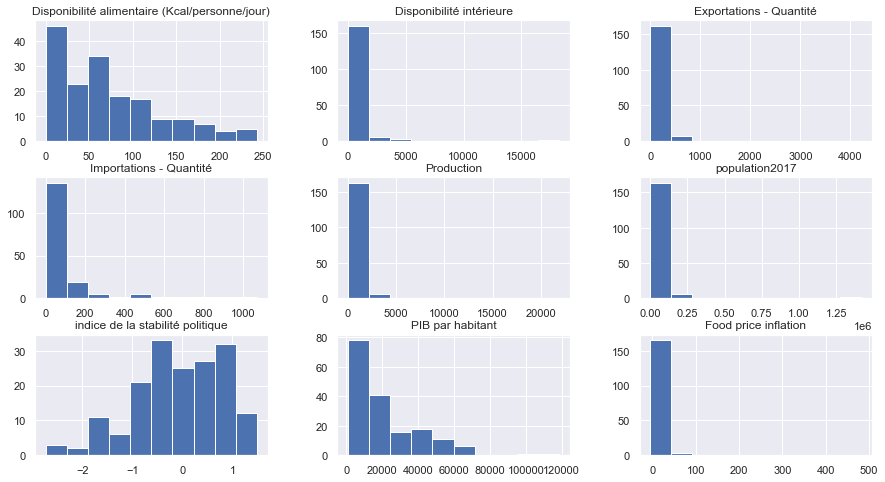

In [216]:
# Visualiser la distribution des fréquences
Df.hist(layout= (3,3), figsize = (15,8))

Les histogrammes suggèrent un manque de symétrie 

In [217]:
# |moyenne - médiane| ???
np.abs(Df.describe().loc['mean']- Df.describe().loc['50%'])

Disponibilité alimentaire (Kcal/personne/jour)       10.558140
Disponibilité intérieure                            581.598837
Exportations - Quantité                             103.750000
Importations - Quantité                              72.488372
Production                                          642.325581
population2017                                    33083.921669
indice de la stabilité politique                      0.062442
PIB par habitant                                   6945.660708
Food price inflation                                  8.084697
dtype: float64

Les écarts(absolus) entre les moyennes et les médianes sont assez grands.
Les données sont très asymétriques

In [218]:
# Evaluation de la dispersion relative des variables (dispersion par unité de moyenne)
# Coefficient de variation
Df.describe().loc['std']*100/Df.describe().loc['mean']

Disponibilité alimentaire (Kcal/personne/jour)      81.240328
Disponibilité intérieure                           320.131947
Exportations - Quantité                            441.509518
Importations - Quantité                            209.998913
Production                                         349.338835
population2017                                     357.276945
indice de la stabilité politique                 -1236.645065
PIB par habitant                                    97.694797
Food price inflation                               318.328656
dtype: float64

Les variables semblent très étalées autour de leurs moyennes. 

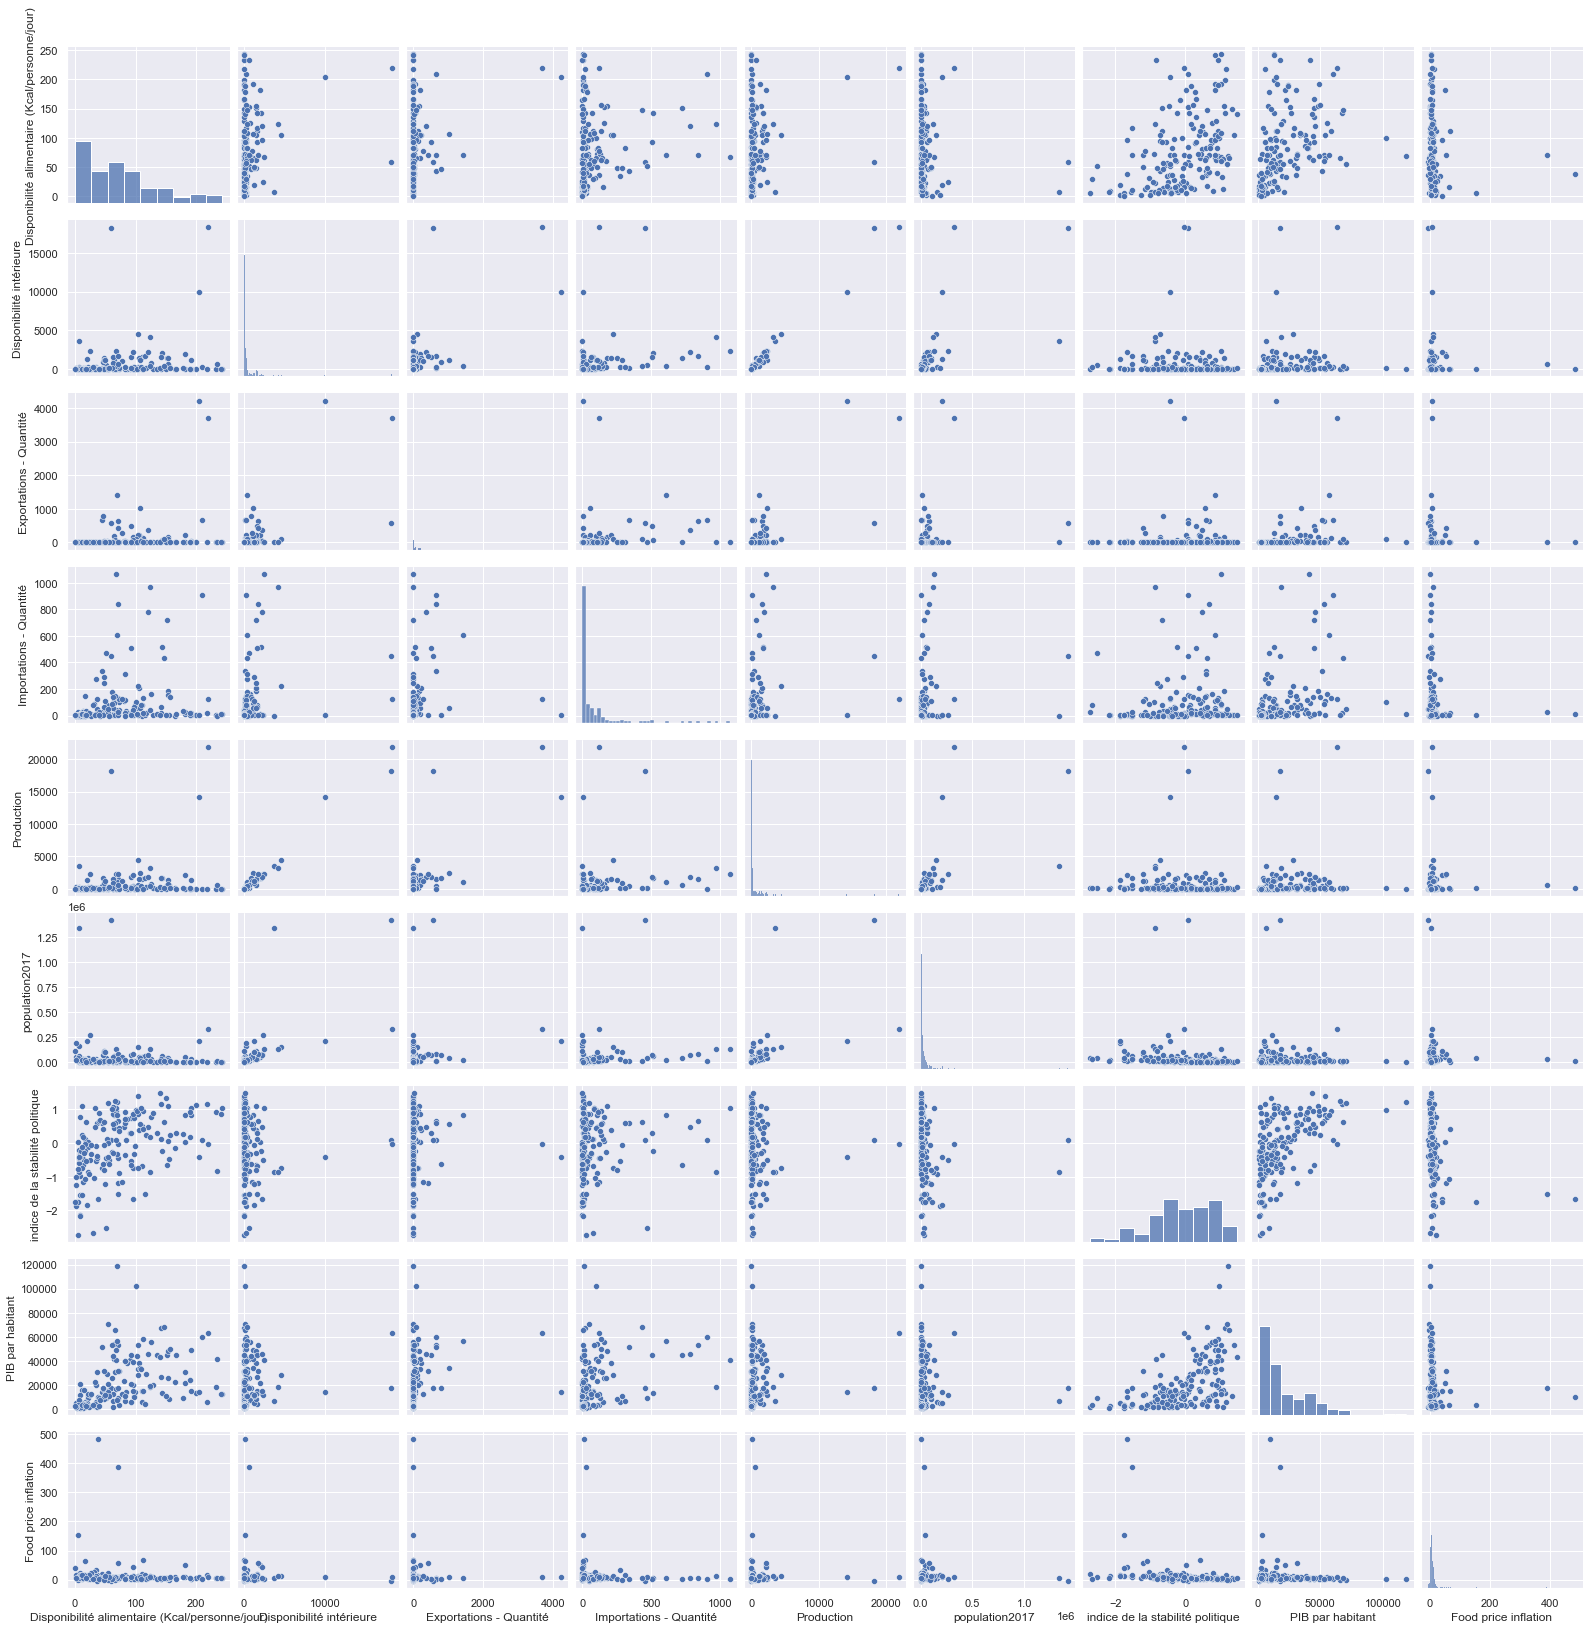

In [219]:
# Visualisation des corrélations et outliers multidimentionnels
sns.pairplot(Df, palette= 'his')

### <a name="C11">2.La compression des variables est-elle pertinente?</a>

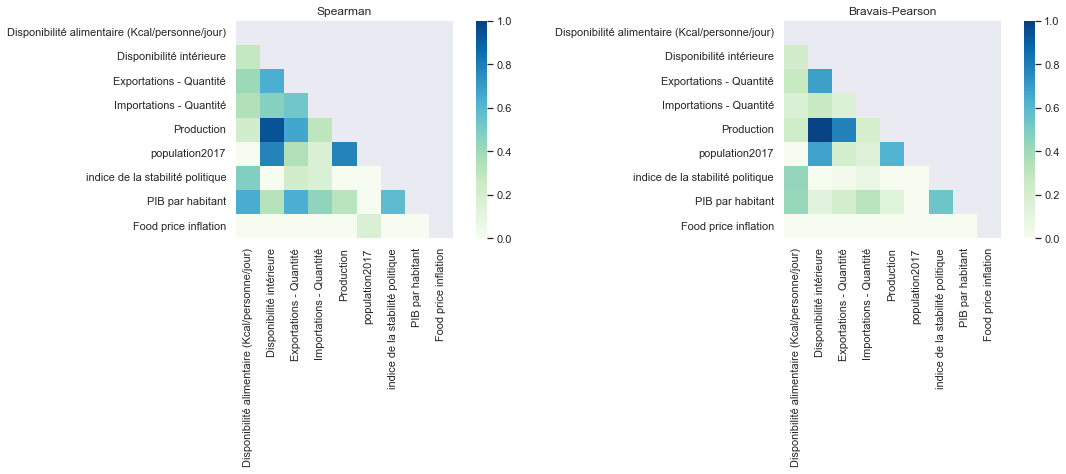

In [220]:
# La compression des variables est-elle pertinente?
# Matrice de correlation
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
correlation_mat = Df.corr(method= "spearman")
mask = np.triu(np.ones_like(correlation_mat))
sns.heatmap(correlation_mat,mask=mask,vmin = 0,vmax= 1, square= True,cmap= "GnBu")
plt.title("Spearman")
plt.subplot(1,2,2)
correlation_mat = Df.corr()
mask = np.triu(np.ones_like(correlation_mat))

sns.heatmap(correlation_mat,mask=mask,vmin = 0,vmax= 1, square= True,cmap= "GnBu")
plt.title("Bravais-Pearson" )
plt.show()


In [221]:
# Supprimer les colonnes inutiles pour l'analyse
Df.drop(columns =['Food price inflation'], inplace=True)

In [222]:
# Tester statistiquement si la compression des variables est pertinente
 # hypothèse nulle : orthogonalité des variables
 # hypothèse alternative : les variables sont corrélées
R = Df.corr()
# Mise en œuvre du test de sphéricité  de Bartlett
n= Df.shape[0]
p= Df.shape[1]
Khi2= -(n-1-(2*p+5)/6)*mt.log(np.linalg.det(R))
ddl= p*(p-1)/2
P_valeur = chi2.pdf(Khi2,ddl)
print(P_valeur<0.01) 


True


On rejette l'hypothèse d'orthogonalité des variables.Une ACP est pertinente

## ** Partie 4: Identification et traitement de outliers **

### <a name="C12">1.Détection de outliers unidimensionnels</a>

<AxesSubplot:>

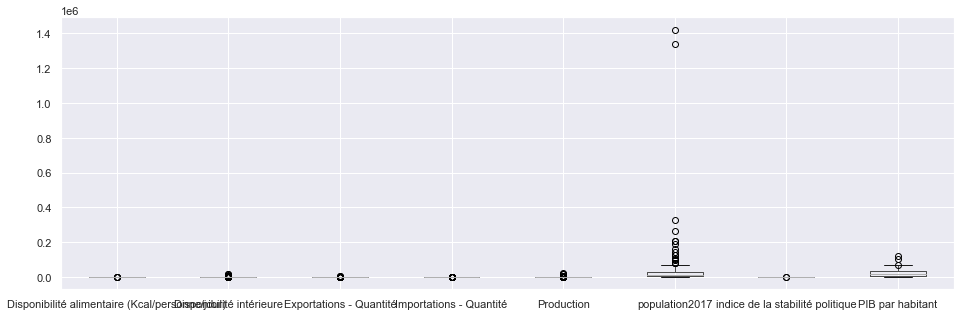

In [223]:
# Visualisation de outliers unidimentionnels
Df.boxplot(figsize = (16,5))

In [224]:
# Identification des outliers unidimentionnels
List_col = np.array(Df.columns)
List_col = np.delete(List_col,0)
allOutliers = []
for element in List_col:
    outliers = []
    q1 = np.quantile(Df[element], 0.25)
    q3 = np.quantile(Df[element], 0.75)
    iqr = q3-q1
    limite_sup = q3+(1.5*iqr)
    limite_inf = q1-(1.5*iqr)
    outliersByElement = Df.loc[(Df[element] <= limite_inf) | (Df[element] >= limite_sup)]['Zone'].tolist()
    for outlierByElement in outliersByElement:
        outliers.append(outlierByElement)
        if outlierByElement not in allOutliers:
            allOutliers.append(outlierByElement)
    print("============================================================================================================")
    print("Les outliers pour l'élément ",element,'sont :')
    print(outliers)
print("============================================================================================================")
print("============================================================================================================")
print("============================================================================================================")
print("La liste de tous les outliers est", allOutliers)
print("============================================================================================================")
print("Le nombre de outliers unidimensionnels est", len(allOutliers))

Les outliers pour l'élément  Disponibilité alimentaire (Kcal/personne/jour) sont :
['Antigua-et-Barbuda', 'Israël', 'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie']
Les outliers pour l'élément  Disponibilité intérieure sont :
['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Argentine', 'Australie', 'Brésil', 'Canada', 'Chine, continentale', 'Colombie', 'Espagne', 'France', 'Fédération de Russie', 'Inde', 'Indonésie', "Iran (République islamique d')", 'Italie', 'Japon', 'Malaisie', 'Mexique', 'Myanmar', 'Pakistan', 'Philippines', 'Pologne', 'Pérou', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Thaïlande', 'Turquie', 'Ukraine', 'Viet Nam', 'Égypte', "États-Unis d'Amérique"]
Les outliers pour l'élément  Exportations - Quantité sont :
['Afrique du Sud', 'Allemagne', 'Argentine', 'Australie', 'Autriche', 'Belgique', 'Brésil', 'Bulgarie', 'Bélarus', 'Canada', 'Chili', 'Chine - RAS de Hong-Kong', 'Chine, continentale', 'Danemark', 'Espagne', 'France', 'Fédération de Russie', '

In [225]:
Df_ALLOutliers = Df.loc[Df['Zone'].isin(allOutliers)]# un DataFrame qui contient les outliers

In [226]:
ALLOutliers_index = list(Df_ALLOutliers.index)
Df_SansOutliers = Df.drop(ALLOutliers_index)# un DataFrame de données sans le 60 outliers 

### <a name="C13">2.Détection de outliers multidimensionnels</a>

In [227]:
# Identification des outliers avec l'algorithme IsolationForest
X = Df.drop(columns= 'Zone').values
model=IsolationForest( contamination=float(0.02)) # Identifier les anomalies qui représentent 2% de données dans le modèle 
model.fit(X)# Entrainer le modèle

IsolationForest(contamination=0.02)

In [228]:
# créer une colonne anaomaly 
X = pd.DataFrame(X)
X['anomaly'] = model.predict(X)
X.head()

,0,1,2,3,4,5,6,7,anomaly
0,5.0,57.0,0.0,29.0,28.0,36296.113,-2.73,2065.0,1
1,143.0,2118.0,63.0,514.0,1667.0,57009.756,-0.24,13126.0,1
2,85.0,47.0,0.0,38.0,13.0,2884.169,0.08,14520.1,1
3,22.0,277.0,0.0,2.0,275.0,41389.189,-0.86,10957.2,1
4,71.0,1739.0,646.0,842.0,1514.0,82658.409,0.67,52930.8,1


In [229]:
anomaly = X.loc[X['anomaly']==-1]
anomaly_index = list(anomaly.index)
anomaly_index

[21, 34, 66, 169]

In [230]:
# La liste de outliers détéctée par l'algorithme IsolationForest( contamination= 0.02) 
outliers = []
for element in anomaly_index:
    outliers = outliers +[Df.iloc[element]['Zone']]
print(outliers)
print(len(outliers))

['Brésil', 'Chine, continentale', 'Inde', "États-Unis d'Amérique"]
4


In [231]:
# Remplacer les valeurs atypiques
Df_modifie = Df.copy(deep = True)
Df_modifie.loc[Df_modifie['Zone']== 'Chine, continentale', 'population2017' ] = np.mean(Df_modifie['population2017'])
Df_modifie.loc[Df_modifie['Zone']== 'Chine, continentale', 'Disponibilité intérieure' ] = np.mean(Df_modifie['Disponibilité intérieure'])
Df_modifie.loc[Df_modifie['Zone']== 'Chine, continentale', 'Importations - Quantité' ] = np.mean(Df_modifie['Importations - Quantité'])
Df_modifie.loc[Df_modifie['Zone']== 'Chine, continentale', 'Exportations - Quantité' ] = np.mean(Df_modifie['Importations - Quantité'])
Df_modifie.loc[Df_modifie['Zone']== 'Chine, continentale', 'Production' ] = np.mean(Df_modifie['Importations - Quantité'])


Df_modifie.loc[Df_modifie['Zone']== 'Brésil', 'Disponibilité intérieure' ] = np.mean(Df_modifie['Disponibilité intérieure'])
Df_modifie.loc[Df_modifie['Zone']== 'Brésil', 'Exportations - Quantité' ] = np.mean(Df_modifie['Importations - Quantité'])
Df_modifie.loc[Df_modifie['Zone']== 'Brésil', 'Production' ] = np.mean(Df_modifie['Importations - Quantité'])
Df_modifie.loc[Df_modifie['Zone']== 'Brésil', 'population2017' ] = np.mean(Df_modifie['population2017'])

Df_modifie.loc[Df_modifie['Zone']== 'Inde', 'Disponibilité intérieure' ] = np.mean(Df_modifie['Disponibilité intérieure'])
Df_modifie.loc[Df_modifie['Zone']== 'Inde', 'Production' ] = np.mean(Df_modifie['Importations - Quantité'])
Df_modifie.loc[Df_modifie['Zone']== 'Inde', 'population2017' ] = np.mean(Df_modifie['population2017'])

Df_modifie.loc[Df_modifie['Zone']== "États-Unis d'Amérique", 'Disponibilité intérieure' ] = np.mean(Df_modifie['Disponibilité intérieure'])
Df_modifie.loc[Df_modifie['Zone']== "États-Unis d'Amérique", 'Exportations - Quantité' ] = np.mean(Df_modifie['Importations - Quantité'])
Df_modifie.loc[Df_modifie['Zone']== "États-Unis d'Amérique", 'Production' ] = np.mean(Df_modifie['Importations - Quantité'])
Df_modifie.loc[Df_modifie['Zone']== "États-Unis d'Amérique", 'population2017' ] = np.mean(Df_modifie['population2017'])

In [233]:
# convertir en csv 
Df.to_csv(r'C:\Users\attia\Df.csv',index = False)
Df_modifie.to_csv(r'C:\Users\attia\Df_modifie.csv',index = False)
Df_ALLOutliers.to_csv(r'C:\Users\attia\Df_ALLOutliers.csv',index = False)
Df_SansOutliers.to_csv(r'C:\Users\attia\Df_SansOutliers.csv',index = False)

## **Partie 5 :L’analyse en composantes principales**

## <a name="C14">1. Etude de données sans aucun traitement de outliers</a>

### <a name="C15">1.1 Data Split</a>

Nous allons maintenant séparer notre matrice notée X du reste de nos données. Nous stockerons les pays dans une variable names et les colonnes dans une variable features.

In [234]:
# Enregister les pays dans une variable nommée names
names = Df.Zone.values
# Enregister les colonnes dans une variable nommée features
features = Df.drop(columns= 'Zone').columns
# matrice de données non étiquetées 
X = Df.drop(columns= 'Zone').values
# Dimensions
X.shape

(172, 8)

### <a name="C16">1.2. Centrer-Réduire (Standardisation) et ACP</a>

In [237]:
# On instancie
scaler = StandardScaler()
# On fit
scaler.fit(X)
# On transforme
X_scaled = scaler.transform(X)

In [238]:
# Vérification ( Données centréés réduites)
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [239]:
#ACP
# les composantes
n_components = 8
# On instancie notre ACP
pca = PCA(n_components = n_components)
# On l'entraine sur les données scalées
pca.fit(X_scaled)

PCA(n_components=8)

### <a name="C17">1.3. Explained variance & scree plot</a>

In [240]:
# La variance captée par chaque nouvelle composante.
pca.explained_variance_ratio_
# Enregister cela dans une variable
scree = (pca.explained_variance_ratio_*100).round(2)
# La somme cumulée de la variance
scree_cum = scree.cumsum().round()
scree_cum

array([ 40.,  65.,  77.,  86.,  93.,  98., 100., 100.])

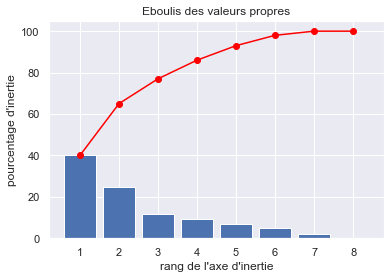

In [241]:
# La liste des composantes
x_list = range(1, n_components+1)
# Affichage
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [242]:
np.argmax(np.cumsum(pca.explained_variance_ratio_*100)>= 75)

2

In [243]:
np.argmax(np.cumsum(pca.explained_variance_ratio_*100)>= 90)

4

On voit ici que près de 75% de la variance est comprise dans les 2 premières composantes et près de 90% est compris dans les 4 premières composantes

### <a name="C18">1.4. Components</a>

In [244]:
# Choix de nombre de composantes
n_components = 3
pca = PCA(n_components = n_components)
pca.fit(X_scaled)
# La liste des composantes
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3]

In [245]:
# Corrélations  entre les variables initiales et les variables synthétiques
pcs = pca.components_
# Version pandas
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population2017,indice de la stabilité politique,PIB par habitant
F1,0.20,0.53,0.44,0.21,0.53,0.35,0.05,0.17
F2,-0.47,0.15,-0.01,-0.18,0.14,0.30,-0.57,-0.54
F3,-0.25,-0.03,-0.32,0.85,-0.14,0.23,-0.15,0.16


<AxesSubplot:>

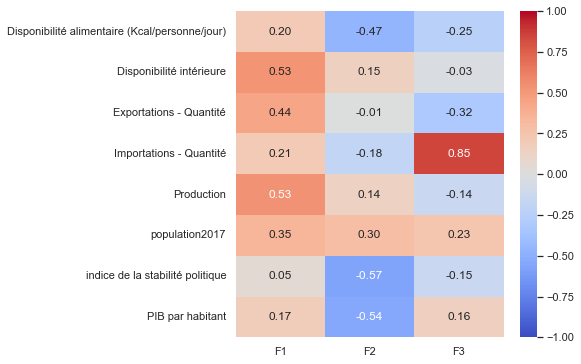

In [246]:
# Représentation plus visuelle des corrélations
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

### <a name="C19">1.5. Correlation graph</a>

In [247]:
# Fonction pour visualiser le cercle de corrélations
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(8, 8))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] ,
                pca.components_[y, i] ,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

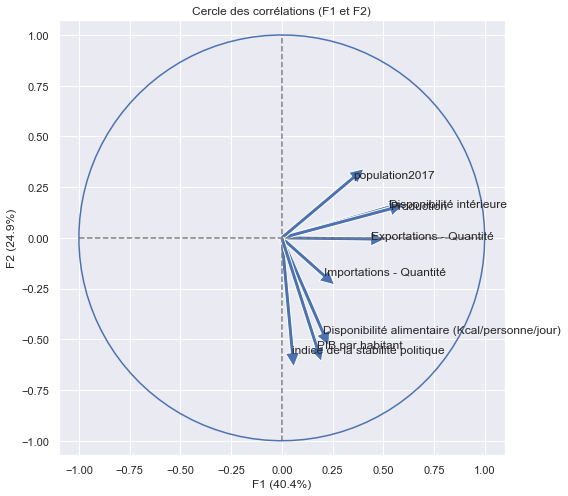

In [248]:
# Visualisation de corrélations sur le premier plan factoriel
x_y = (0,1)
correlation_graph(pca, x_y, features)

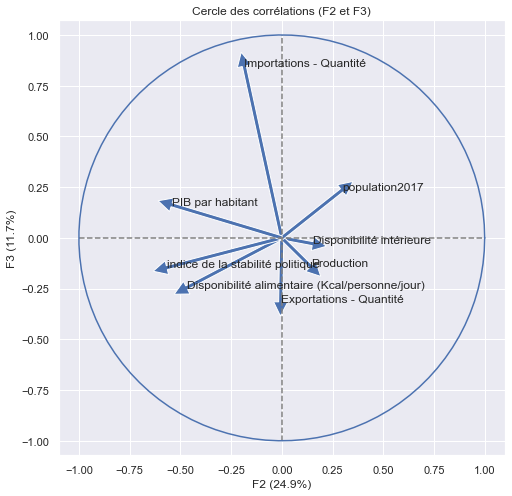

In [249]:
# Visualisation de corrélations sur le premier plan factoriel
x_y = (1,2)
correlation_graph(pca, x_y, features)

### <a name="C20">1.6. Projection</a>

In [250]:
# Les coordonnées des individus dans le nouvel espace 
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-1.03297626,  2.69175573,  0.40617412],
       [ 1.18497634, -0.45985214,  1.60787143],
       [-0.56297874, -0.11986764, -0.29026328],
       [-0.70039614,  1.20217647, -0.03149329],
       [ 2.19779752, -1.86546029,  3.21973753]])

In [251]:
# Fonction Visualise la projection de individus 
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=None, 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en un df
    X_ = pd.DataFrame(X_projected)
    
    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # On définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # On rajoute la color, les clusters et les labels à X_
    X_["clusters"] =  clusters if clusters is not None else "None" 
    X_["labels"] =  labels if labels is not None else "None"
    c_unique_list = X_["clusters"].sort_values().unique()
    c_dict = {j:i+1 for i, j in enumerate(c_unique_list)}
    X_["colors"] = X_["clusters"].apply(lambda i : c_dict[i])

    # Pour chaque couleur / cluster
    for c in sorted(X_.clusters.unique()) : 
        # On selectionne le sous DF
        sub_X =X_.loc[X_.clusters == c, : ]

        # Clusters and color
        cluster = sub_X.clusters.iloc[0]
        color = sub_X.colors.iloc[0]

        # On affiche les points
        ax.scatter(    sub_X.iloc[:, x], 
                        sub_X.iloc[:, y], 
                        alpha=alpha, 
                        label = cluster ,
                        cmap="Set1", 
                        marker=marker)
        
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_.iloc[:, x]).max() *1.1
    y_max = np.abs(X_.iloc[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='black', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='black', alpha=0.8)

    country_coor = []
    


    # Affichage des labels des points
    if labels is not None:  
        for i,(_x,_y) in enumerate(X_projected[:,[x,y]]):
            plt.text(_x, _y, labels[i], fontsize='14', ha='center',va='center') 

    # Titre, legend et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    if clusters is not None: 
        plt.legend()
    plt.show()

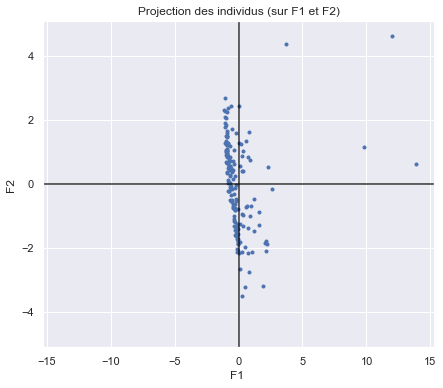

In [252]:
# Affichage  de la projection des individus sur le plan(F1,F2)
x_y = (0,1)
display_factorial_planes(X_proj, x_y)

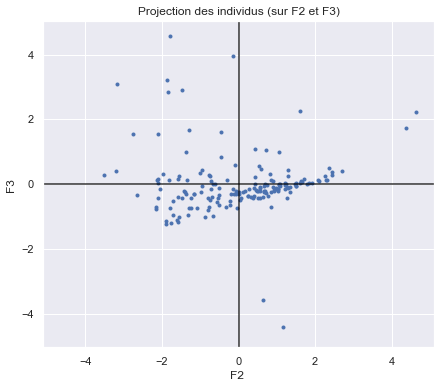

In [253]:
# Affichage de la projection des individus sur le plan(F3,F4)
x_y = (1,2)
display_factorial_planes(X_proj, x_y)

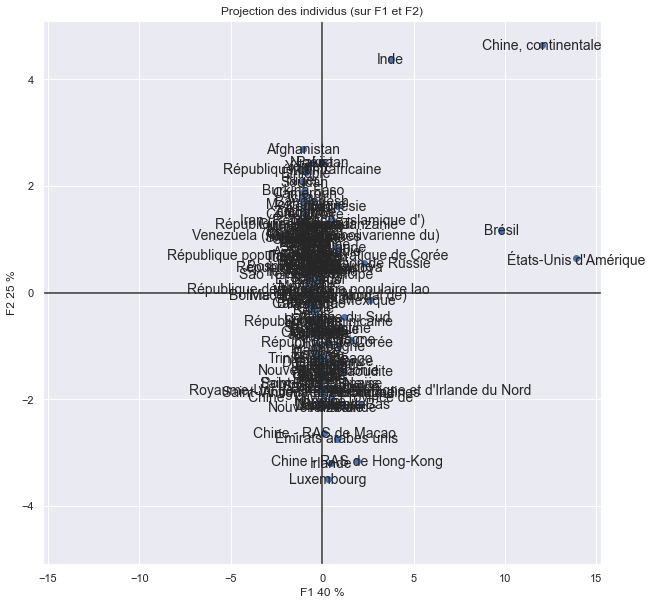

In [254]:
# Affichage de la projection des individus avec leurs libellés sur le plan(F1,F2) 
x_y = (0,1)
display_factorial_planes(X_proj, x_y, pca, labels = names, figsize=(10,10), marker="o")

### <a name="C21">2. Etude de données outliers (60 outliers)</a>

### 1. Data split

In [255]:
# Enregister les pays dans une variable nommée names
names_Outliers = Df_ALLOutliers.Zone.values
# Données non étiquitées
X_Outliers = Df_ALLOutliers.drop(columns = 'Zone').values
X_Outliers[:5]

array([[ 5.0000000e+00,  5.7000000e+01,  0.0000000e+00,  2.9000000e+01,
         2.8000000e+01,  3.6296113e+04, -2.7300000e+00,  2.0650000e+03],
       [ 1.4300000e+02,  2.1180000e+03,  6.3000000e+01,  5.1400000e+02,
         1.6670000e+03,  5.7009756e+04, -2.4000000e-01,  1.3126000e+04],
       [ 7.1000000e+01,  1.7390000e+03,  6.4600000e+02,  8.4200000e+02,
         1.5140000e+03,  8.2658409e+04,  6.7000000e-01,  5.2930800e+04],
       [ 3.5000000e+01,  3.1900000e+02,  0.0000000e+00,  2.7700000e+02,
         4.2000000e+01,  2.9816766e+04, -5.2000000e-01,  5.9904000e+03],
       [ 2.3300000e+02,  7.0000000e+00,  0.0000000e+00,  7.0000000e+00,
         0.0000000e+00,  9.5426000e+01,  9.3000000e-01,  1.8057300e+04]])

### 2. Standardisation et ACP

In [256]:
# On instancie
scaler_Outliers = StandardScaler()
# On fit
scaler_Outliers.fit(X_Outliers)
# On transforme
X_scaled_Outliers = scaler_Outliers.transform(X_Outliers)

In [257]:
# Vérification ( Données centrées réduites)
idx = ["mean", "std"]
pd.DataFrame(X_scaled_Outliers).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01


In [258]:
#ACP
# les composantes
n_components = 8
# On instancie notre ACP
pca = PCA(n_components = n_components)
# On l'entraine sur les données scalées
pca.fit(X_scaled_Outliers)

PCA(n_components=8)

###  3. Explained variance & scree plot

In [259]:
# La variance captée par chaque nouvelle composante.
pca.explained_variance_ratio_
# Enregister cela dans une variable
scree = (pca.explained_variance_ratio_*100).round(2)
# La somme cumulée de la variance
scree_cum = scree.cumsum().round()
scree_cum

array([ 37.,  63.,  76.,  86.,  94.,  98., 100., 100.])

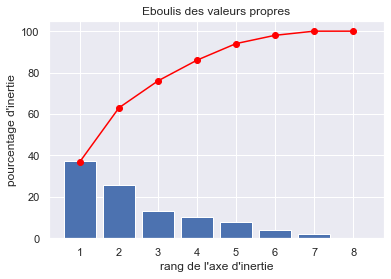

In [260]:
# La liste des composantes
x_list = range(1, n_components+1)
# Affichage
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

### 4. Components

In [261]:
n_components = 3
pca = PCA(n_components = n_components)
pca.fit(X_scaled_Outliers)

PCA(n_components=3)

In [262]:
# La liste des composantes
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3]

In [263]:
# Corrélations entre variables initiales et variables synthétiques
pcs = pca.components_
# Version pandas
pcs = pd.DataFrame(pcs)
# Colonne et index
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)


,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population2017,indice de la stabilité politique,PIB par habitant
F1,0.14,0.56,0.45,0.06,0.57,0.36,0.01,0.02
F2,-0.44,0.06,-0.15,-0.21,0.03,0.31,-0.58,-0.56
F3,-0.43,0.06,-0.28,0.72,-0.05,0.37,0.12,0.22


<AxesSubplot:>

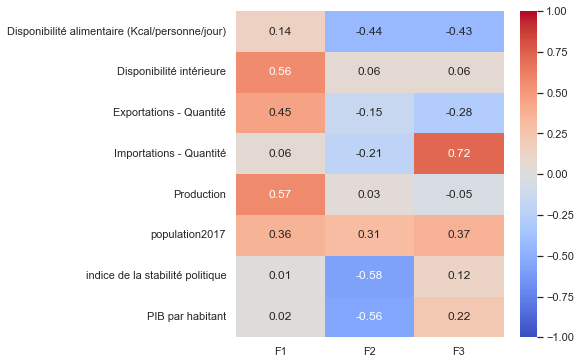

In [264]:
# Représentation plus visuelle
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

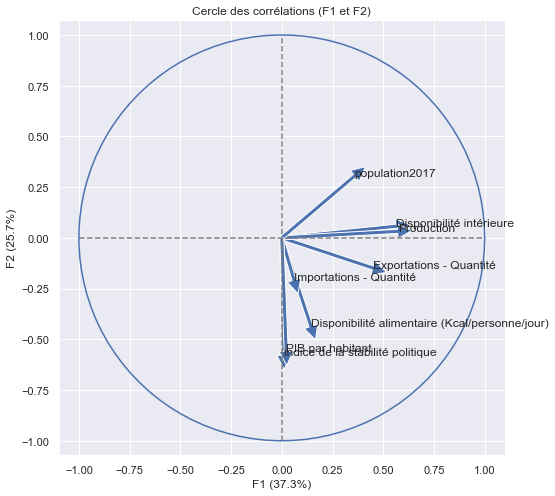

In [265]:
## Correlation graph
x_y = (0,1)
correlation_graph(pca, x_y, features)

### 5. Projection

In [266]:
# Les coordonnées des individus dans le nouvel espace 
X_proj_Outliers = pca.transform(X_scaled_Outliers)
X_proj_Outliers[:5]

array([[-1.12422221,  2.80743111, -0.40021278],
       [-0.02359857, -0.09809435,  0.36728637],
       [ 0.23997681, -1.38652708,  2.01560047],
       [-0.94053104,  1.07971347,  0.34503509],
       [-0.62883951, -1.20376036, -1.48626134]])

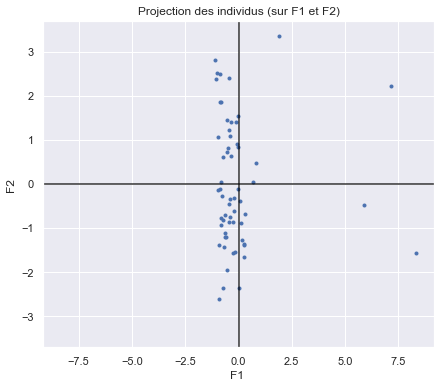

In [267]:
# Affichage de la projection des individus sur le plan(F1,F2)
x_y = (0,1)
display_factorial_planes(X_proj_Outliers, x_y)

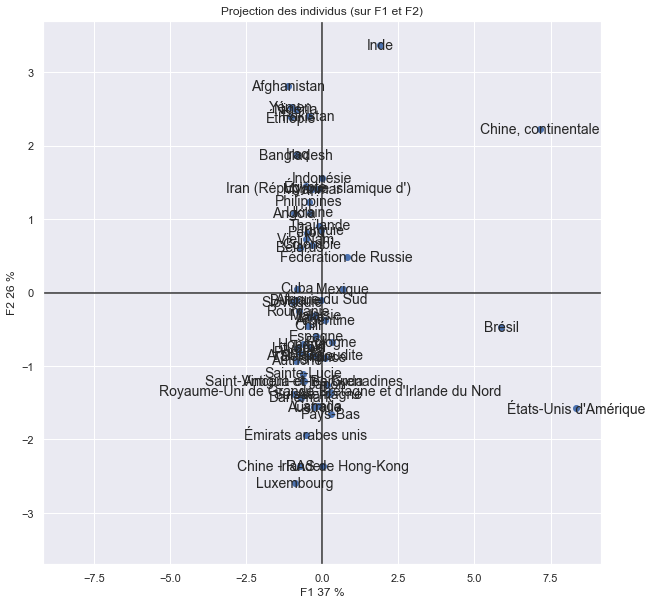

In [268]:
# Affichage  de la projection des individus sur le plan(F1,F2) 
x_y = (0,1)
display_factorial_planes(X_proj_Outliers, x_y, pca, labels = names_Outliers, figsize=(10,10), marker="o")

### <a name="C22">3. Etude de données sans outliers (112 individus)</a>

### 1. Data split

In [269]:
# Enregister les pays dans une variable nommée names
names_SansOutliers = Df_SansOutliers.Zone.values
# Matrice de données non étiquitées
X_SansOutliers = Df_SansOutliers.drop(columns= 'Zone').values
# Dimensions
X_SansOutliers.shape

(112, 8)

### 2. Standardisation et ACP

In [270]:
# On instancie
scaler_SansOutliers = StandardScaler()
# On fit
scaler_SansOutliers.fit(X_SansOutliers)
# On transforme
X_scaled_SansOutliers = scaler_SansOutliers.transform(X_SansOutliers)

In [271]:
# PCA
# les composantes
n_components = 8
# On instancie notre ACP
pca = PCA(n_components = n_components)
# On l'entraine sur les données scalées
pca.fit(X_scaled_SansOutliers)

PCA(n_components=8)

### 3. Explained variance & scree plot

In [272]:
# La variance captée par chaque nouvelle composante.
pca.explained_variance_ratio_
# Enregister cela dans une variable
scree = (pca.explained_variance_ratio_*100).round(2)
# La somme cumulée de la variance
scree_cum = scree.cumsum().round()
scree_cum

array([ 34.,  65.,  78.,  86.,  92.,  96., 100., 100.])

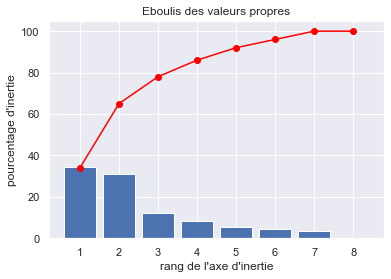

In [273]:
# La liste des composantes
x_list = range(1, n_components+1)
# Affichage
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

### 4. Components

In [274]:
n_components = 3
pca = PCA(n_components = n_components)
pca.fit(X_scaled_SansOutliers)
# La liste des composantes
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3]

In [275]:
# Corrélations entre variables initiales et variables synthétiques
pcs = pca.components_
# Version pandas
pcs = pd.DataFrame(pcs)
# index et colonnes
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population2017,indice de la stabilité politique,PIB par habitant
F1,0.29,0.48,0.34,0.38,0.45,0.08,0.23,0.41
F2,-0.36,0.34,-0.14,0.07,0.34,0.54,-0.48,-0.31
F3,-0.50,-0.21,0.64,0.43,-0.30,0.02,-0.12,0.06


<AxesSubplot:>

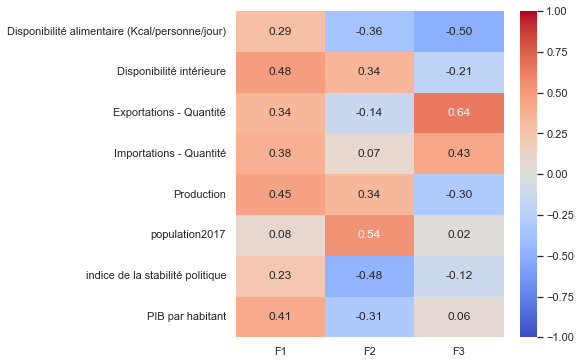

In [277]:
# Représentation plus visuelle
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

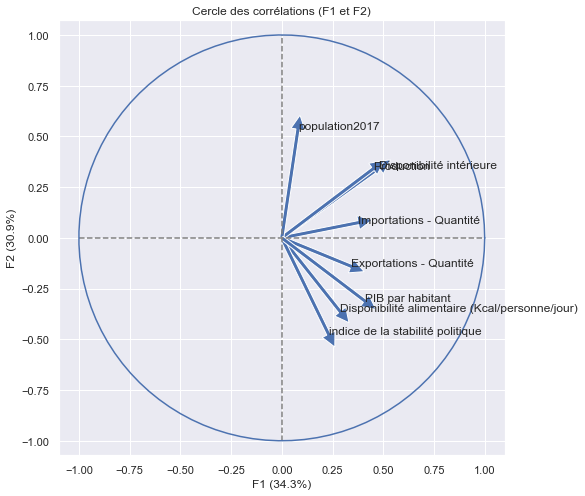

In [278]:
## Correlation graph
x_y = (0,1)
correlation_graph(pca, x_y, features)

### 6. Projection

In [279]:
# Projection
X_proj_SansOutliers = pca.transform(X_scaled_SansOutliers)
X_proj_SansOutliers[:5]

array([[-0.36295679, -0.73017294, -0.17786764],
       [ 0.35489445,  3.04924496, -0.63811606],
       [-0.7779323 , -0.12486828,  0.17038429],
       [-0.34439051,  0.69739914, -0.0824086 ],
       [ 0.5605453 , -2.35459851, -1.23981226]])

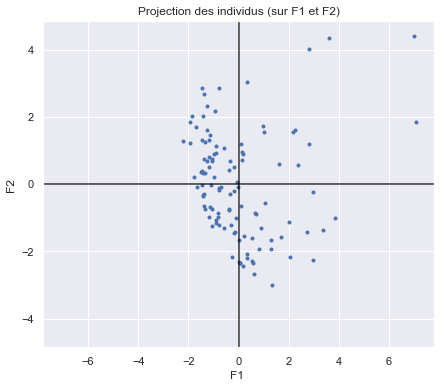

In [280]:
# Affichage de la projection des individus sur le plan(F1,F2)
x_y = (0,1)
display_factorial_planes(X_proj_SansOutliers, x_y)

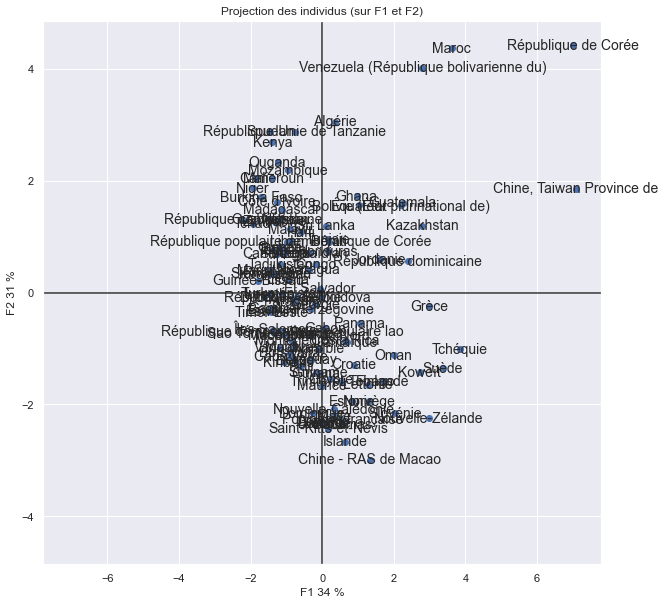

In [281]:
# Affichage  de la projection des individus sur le plan(F1,F2) 
x_y = (0,1)
display_factorial_planes(X_proj_SansOutliers, x_y, pca, labels = names_SansOutliers, figsize=(10,10), marker="o")

### <a name="C23">4. Etude de données traitées (imputation par la moyenne de valeurs extrêmes de 4 pays)</a>

In [283]:
# Chargement des données
Df_modifie = pd.read_csv("Df_modifie.csv")

### 1. Data split

In [284]:
# Enregister les pays dans une variable nommée names
names = Df_modifie.Zone.values
# Enregister les colonnes dans une variable nommée features
features = Df_modifie.drop(columns= 'Zone').columns
# Matrice de données non étiquitées
X = Df_modifie.drop(columns= 'Zone').values
# Dimensions
X.shape

(172, 8)

### 2. Centrer-Réduire (Standardisation) et ACP

In [285]:
# Standardisation
# On instancie
scaler = StandardScaler()
# On fit
scaler.fit(X)
# On transforme
X_scaled = scaler.transform(X)
# Vérification ( Données centréés réduites)
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [286]:
# PCA
# les composantes
n_components = 8
# On instancie notre ACP
pca = PCA(n_components = n_components)
# On l'entraine sur les données scalées
pca.fit(X_scaled)

PCA(n_components=8)

###  3. Explained variance & scree plot

In [287]:
# La variance captée par chaque nouvelle composante.
pca.explained_variance_ratio_
# Enregister cela dans une variable
scree = (pca.explained_variance_ratio_*100).round(2)
# La somme cumulée de la variance
scree_cum = scree.cumsum().round()
scree_cum

array([ 39.,  66.,  77.,  84.,  91.,  96., 100., 100.])

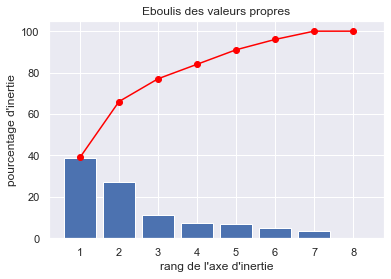

In [288]:
# La liste des composantes
x_list = range(1, n_components+1)
list(x_list)
# Affichage
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

### 4. Components

In [289]:
# Choix des 3 premières composantes
n_components = 3
pca = PCA(n_components = n_components)
pca.fit(X_scaled)
# La liste des composantes
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3]

In [290]:
# Corrélations entre les variables initiales et les variables synthétiques
pcs = pca.components_
# Version pandas
pcs = pd.DataFrame(pcs)
# Colonne et indexe
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population2017,indice de la stabilité politique,PIB par habitant
F1,0.15,0.53,0.30,0.40,0.52,0.38,-0.02,0.19
F2,-0.45,0.12,-0.19,-0.13,0.11,0.36,-0.57,-0.51
F3,-0.52,-0.27,0.71,0.30,-0.16,-0.11,-0.11,0.06


<AxesSubplot:>

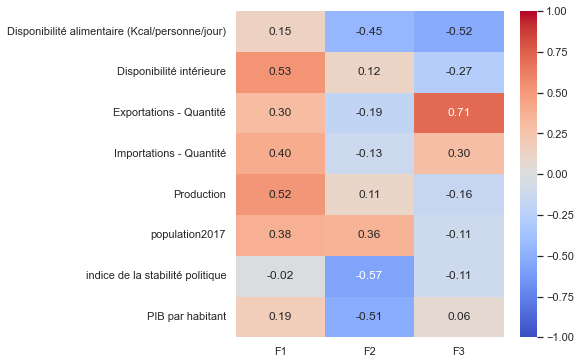

In [291]:
# Représentation plus visuelle
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

<div class="alert alert-block alert-info">
F1 : Facteur social ((grande/faible) production, et disponibilité intérieure, (grande/petite) population).<br> 
F2 : Facteur stabilité (stabilité économique politique et disponibilité alimentaire )<br> 
F3 : Facteur légal (échange commercial de volailles).
</div> 

### 5. Correlation graph

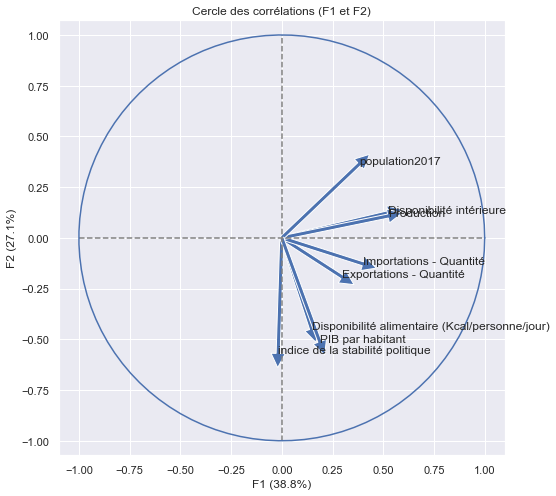

In [293]:
# Visualisation des corrélations sur le premier plan factoriel
x_y = (0,1)
correlation_graph(pca, x_y, features)

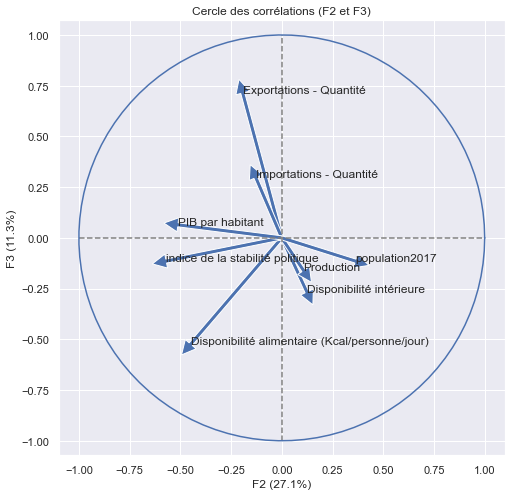

In [295]:
# Visualisation des corrélations sur le deuxième plan factoriel
x_y = (1,2)
correlation_graph(pca, x_y, features)

<div class="alert alert-block alert-info">
F1 capte les données de la production , la disponibilité intérieure et la population, on l'appelle facteur social. <br>
F2 capte les données de stabilité politique, économique et sécurité alimentaire, on l'appelle facteur d'instabilité.<br>
F3 capte l'exportation, l'importation et la disponibilité alimentaire, on l'appelle facteur légal ou échange de volaille interne et externe.<br> 
</div> 

### 6. Projection 

In [296]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-0.91053378,  2.78086069,  0.74293461],
       [ 3.61399076,  0.28953646, -0.91950079],
       [-0.98196105, -0.24091409, -0.15197199],
       [-0.48332218,  1.38024976,  0.18474606],
       [ 5.33339214, -1.47510763,  2.69515472]])

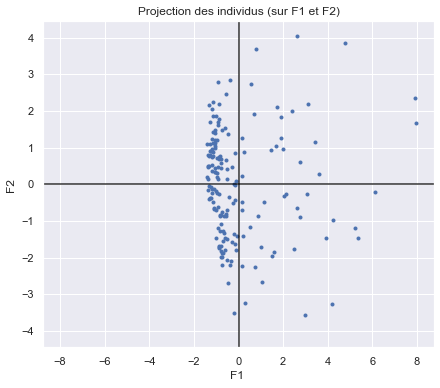

In [297]:
# Affichage de la projection des individus sur le plan(F1,F2)
x_y = (0,1)
display_factorial_planes(X_proj, x_y)

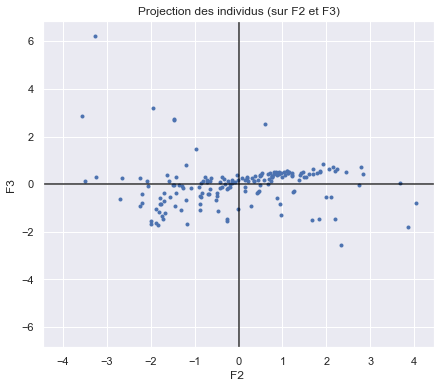

In [298]:
# Affichage  de la projection des individus sur le plan(F2,F3)
x_y = (1,2)
display_factorial_planes(X_proj, x_y)

In [301]:
# convertir en csv 
X_proj = pd.DataFrame(X_proj)
X_proj.to_csv(r'C:\Users\attia\X_proj.csv',index = False)